# **SpaceX  Falcon 9 First Stage Landing Prediction**


# 2. Web Scraping Launch Records from Wikipedia
- Extract Falcon 9 launch records from a HTML table from [Wikipedia](https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches)
- Parse the table and convert it into a Pandas data frame for
  - Exploratory Data Analysis
  - Machine Learning Model Building

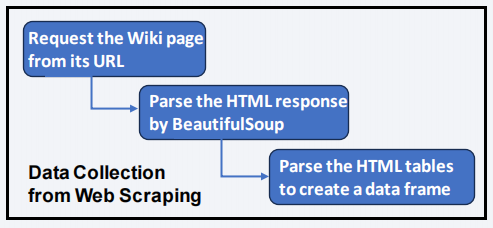

The Wikipedia page contains launch records about different Falcon 9 rockets and Falcon Heavy rockets.

![](https://upload.wikimedia.org/wikipedia/commons/f/f7/Falcon_rocket_family6.svg)


The launch records are stored in a HTML table like below:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_1_L2/images/falcon9-launches-wiki.png)


## 2.1. Import Required Libraries


In [1]:
!pip3 install beautifulsoup4
!pip3 install requests

In [2]:
import sys
import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

## 2.2. Send Request and Parse with BeautifulSoup

In [4]:
# wiki split the launch records to two pages, one for before 2019 and one for after 2019
wiki_url_1 = "https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches_(2010%E2%80%932019)"
wiki_url_2 = "https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches"

In [5]:
# use requests.get() method to request the HTML page
# assign the response to a object
response_1 = requests.get(wiki_url_1).text
response_1[0:200]

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-'

In [6]:
response_2 = requests.get(wiki_url_2).text
response_2[0:200]

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-'

In [7]:
# Use BeautifulSoup() to create a BeautifulSoup object from a response text content
soup_1 = BeautifulSoup(response_1, 'html.parser')
soup_2 = BeautifulSoup(response_2, 'html.parser')

In [8]:
# Use soup.title to verify if BeautifulSoup work properly or not
print(soup_1.title)
print(soup_2.title)

<title>List of Falcon 9 and Falcon Heavy launches (2010–2019) - Wikipedia</title>
<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>


## 2.3. Extract Column Names from the HTML Table Headers


### 2.3.1. Find one table with launch records


In [17]:
# Use the find_all function in the BeautifulSoup object, with element type `table`
# Assign the result to a list called `html_tables`
html_tables_1 = soup_1.find_all('tr')

# after several tries, the 4th table contains launch records needed
html_tables_1[3]

<tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_5-0"><a href="#cite_note-booster-5">[a]</a></sup>
</th>
<th scope="col">Launch site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_6-0"><a href="#cite_note-Dragon-6">[b]</a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 9 first-stage landing tests">Booster<br/>landing</a>
</th></tr>

In [21]:
# Use the find_all function in the BeautifulSoup object, with element type `table`
# Assign the result to a list called `html_tables`
html_tables_2 = soup_2.find_all('tr')

# after several tries, the 4th table contains launch records needed
html_tables_2[3]

<tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>booster</a><sup class="reference" id="cite_ref-booster_17-0"><a href="#cite_note-booster-17">[b]</a></sup>
</th>
<th scope="col">Launch<br/>site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_18-0"><a href="#cite_note-Dragon-18">[c]</a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 9 first-stage landing tests">Booster<br/>landing</a>
</th></tr>

In [22]:
# Let's print the third table and check its content
first_launch_table = html_tables_1[3]
second_launch_table = html_tables_2[3]

**Note:**
* The columns names are embedded in the table header elements `<th>`.
* Need to iterate through `<th>` and extract column names.


### 2.3.2. Extract column names

In [29]:
# define a function to help with column name extraction
def extract_column_from_header(row):
    
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name    

In [26]:
column_names_1 = []

for i, col in enumerate(first_launch_table.find_all('th')):
    print(i, col)
    header = extract_column_from_header(col)
    print(header)
    if header != '' and len(header) > 0:
        column_names_1.append(header)

print(column_names_1)

0 <th scope="col">Flight No.
</th>
Flight No.
1 <th scope="col">Date andtime ()
</th>
Date and time ( )
2 <th scope="col"> 
</th>

3 <th scope="col">Launch site
</th>
Launch site
4 <th scope="col">Payload
</th>
Payload
5 <th scope="col">Payload mass
</th>
Payload mass
6 <th scope="col">Orbit
</th>
Orbit
7 <th scope="col">Customer
</th>
Customer
8 <th scope="col">Launchoutcome
</th>
Launch outcome
9 <th scope="col">
</th>

['Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome']


In [27]:
column_names_2 = []

for i, col in enumerate(second_launch_table.find_all('th')):
    print(i, col)
    header = extract_column_from_header(col)
    print(header)
    if header != '' and len(header) > 0:
        column_names_2.append(header)

print(column_names_2)

0 <th scope="col">Flight No.
</th>
Flight No.
1 <th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
Date and time ( )
2 <th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>booster</a><sup class="reference" id="cite_ref-booster_17-0"><a href="#cite_note-booster-17">[b]</a></sup>
</th>

3 <th scope="col">Launch<br/>site
</th>
Launch site
4 <th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_18-0"><a href="#cite_note-Dragon-18">[c]</a></sup>
</th>
Payload
5 <th scope="col">Payload mass
</th>
Payload mass
6 <th scope="col">Orbit
</th>
Orbit
7 <th scope="col">Customer
</th>
Customer
8 <th scope="col">Launch<br/>outcome
</th>
Launch outcome
9 <th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 9 first-stage landing tests">Booster<br/>landing</a>
</th>

['Flight No.', 'Date and time ( )', 'Launch sit

**Note:**
Column names in the two tables are the same. 

## 2.4. Create Data Frame


In [106]:
# create dictionary with keys from the extracted columns names
launch_dict = dict.fromkeys(column_names_1)

# remove an irrelvant column
del launch_dict['Date and time ( )']

# initial the launch_dict with empty lists
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []

# Added new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

launch_dict

{'Flight No.': [],
 'Launch site': [],
 'Payload': [],
 'Payload mass': [],
 'Orbit': [],
 'Customer': [],
 'Launch outcome': [],
 'Version Booster': [],
 'Booster landing': [],
 'Date': [],
 'Time': []}

In [107]:
# define some helper functions to help extract info from HTML table
def date_time(table_cells):
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    out=[i for i in table_cells.strings][0]
    return out
def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass

In [108]:
import numpy as np

# need to extract rows from table to fill up launch_dict
extracted_row = 0

#Extract each table 
for table_number, table in enumerate(soup_1.find_all('table', "wikitable plainrowheaders collapsible")):

    # get table row 
    for rows in table.find_all("tr"):
        
        #check to see if first table heading is as number corresponding to launch 
        if rows.th:
            if rows.th.string:
                flight_number = rows.th.string.strip()
                flag = flight_number.isdigit()
        else:
            flag = False

        #get table element 
        row=rows.find_all('td')
        
        #if the first table heading is a launch number 
        if flag:
            extracted_row += 1
            
            # Flight No.
            launch_dict['Flight No.'].append(flight_number)
            
            # Date                        
            datatimelist=date_time(row[0])
            date = datatimelist[0].strip(',')
            launch_dict['Date'].append(date)
                        
            # Time
            time = datatimelist[1]
            launch_dict['Time'].append(time)
                                      
            # Booster version
            bv=booster_version(row[1])
            if not(bv):
                bv=row[1].a.string
            launch_dict['Version Booster'].append(bv)
            
            # Launch Site
            launch_site = ''.join(list(row[2].strings)[0:3])
            launch_site =  launch_site.replace(",", " ")
            launch_dict['Launch site'].append(launch_site)
            
            # Payload
            payload = row[3].a.string
            launch_dict['Payload'].append(payload)
                    
            # Payload Mass
            payload_mass = get_mass(row[4])
            launch_dict['Payload mass'].append(payload_mass)
                    
            # Orbit
            orbit = row[5].a.string
            launch_dict['Orbit'].append(orbit)
                    
            # Customer
            try:
                customer = row[6].a.string
            except:
                customer = 'NaN'
            launch_dict['Customer'].append(customer)
                    
            # Launch outcome
            launch_outcome = list(row[7].strings)[0]
            launch_dict['Launch outcome'].append(launch_outcome)
                      
            # Booster landing
            booster_landing = landing_status(row[8])
            launch_dict['Booster landing'].append(booster_landing)
            

In [109]:
# need to extract rows from table to fill up launch_dict
extracted_row = 0

#Extract each table 
for table_number, table in enumerate(soup_2.find_all('table', "wikitable plainrowheaders collapsible")):

    # get table row 
    for rows in table.find_all("tr"):
        
        #check to see if first table heading is as number corresponding to launch 
        if rows.th:
            if rows.th.string:
                flight_number = rows.th.string.strip()
                flag = flight_number.isdigit()
        else:
            flag = False

        #get table element 
        row=rows.find_all('td')
        
        #if the first table heading is a launch number 
        if flag:
            extracted_row += 1
            
            # Flight No.
            launch_dict['Flight No.'].append(flight_number)
            
            # Date                        
            datatimelist=date_time(row[0])
            date = datatimelist[0].strip(',')
            launch_dict['Date'].append(date)
                        
            # Time
            time = datatimelist[1]
            launch_dict['Time'].append(time)
                                      
            # Booster version
            bv=booster_version(row[1])
            if not(bv):
                bv=row[1].a.string
            launch_dict['Version Booster'].append(bv)
            
            # Launch Site
            launch_site = ''.join(list(row[2].strings)[0:3])
            launch_site =  launch_site.replace(",", " ")
            launch_dict['Launch site'].append(launch_site)
            
            # Payload
            payload = row[3].a.string
            launch_dict['Payload'].append(payload)
                    
            # Payload Mass
            payload_mass = get_mass(row[4])
            launch_dict['Payload mass'].append(payload_mass)
                    
            # Orbit
            orbit = row[5].a.string
            launch_dict['Orbit'].append(orbit)
                    
            # Customer
            try:
                customer = row[6].a.string
            except:
                customer = 'NaN'
            launch_dict['Customer'].append(customer)
                    
            # Launch outcome
            launch_outcome = list(row[7].strings)[0]
            launch_dict['Launch outcome'].append(launch_outcome)
                      
            # Booster landing
            booster_landing = landing_status(row[8])
            launch_dict['Booster landing'].append(booster_landing)
            

In [110]:
launch_dict['Date']

['4 June 2010',
 '8 December 2010',
 '22 May 2012',
 '8 October 2012',
 '1 March 2013',
 '29 September 2013',
 '3 December 2013',
 '6 January 2014',
 '18 April 2014',
 '14 July 2014',
 '5 August 2014',
 '7 September 2014',
 '21 September 2014',
 '10 January 2015',
 '11 February 2015',
 '2 March 2015',
 '14 April 2015',
 '27 April 2015',
 '28 June 2015',
 '22 December 2015',
 '17 January 2016',
 '4 March 2016',
 '8 April 2016',
 '6 May 2016',
 '27 May 2016',
 '15 June 2016',
 '18 July 2016',
 '14 August 2016',
 '14 January 2017',
 '19 February 2017',
 '16 March 2017',
 '30 March 2017',
 '1 May 2017',
 '15 May 2017',
 '3 June 2017',
 '23 June 2017',
 '25 June 2017',
 '5 July 2017',
 '14 August 2017',
 '24 August 2017',
 '7 September 2017',
 '9 October 2017',
 '11 October 2017',
 '30 October 2017',
 '15 December 2017',
 '23 December 2017',
 '8 January 2018',
 '31 January 2018',
 '22 February 2018',
 '6 March 2018',
 '30 March 2018',
 '2 April 2018',
 '18 April 2018',
 '11 May 2018',
 '22 

In [111]:
# check the dictionary length
for key in launch_dict:
    print(len(launch_dict[key]))

232
232
232
232
232
232
232
232
232
232
232


In [112]:
# convert to pandas dataframe
df=pd.DataFrame(launch_dict)
df.tail()

,Flight No.,Launch site,Payload,Payload mass,Orbit,Customer,Launch outcome,Version Booster,Booster landing,Date,Time
227,228,VSFB SLC-4E,Starlink Group 2-10,"~16,400 kg",LEO,SpaceX,Success\n,F9 B5,Success,31 May 2023,06:02
228,229,CCSFS SLC-40,Starlink Group 6-4,"~17,600 kg",LEO,SpaceX,Success\n,F9 B5,Success,4 June 2023,12:20
229,230,KSC LC-39A,SpaceX CRS-28,"~9,525 kg",LEO,NASA,Success\n,F9 B5B1077.5,Success,5 June 2023,15:47
230,231,CCSFS SLC-40,Starlink Group 5-11,"~16,400 kg",LEO,SpaceX,Success\n,F9 B5,Success,12 June 2023,07:10
231,232,VSFB SLC-4E,None,U,SSO,NaN,Success\n,F9 B5,Success,12 June 2023,21:35


In [120]:
import datetime

# convert date to date formate
df['Date'] = pd.to_datetime(df['Date']).dt.date
df.tail()

,Flight No.,Launch site,Payload,Payload mass,Orbit,Customer,Launch outcome,Version Booster,Booster landing,Date,Time
227,228,VSFB SLC-4E,Starlink Group 2-10,"~16,400 kg",LEO,SpaceX,Success\n,F9 B5,Success,2023-05-31,06:02
228,229,CCSFS SLC-40,Starlink Group 6-4,"~17,600 kg",LEO,SpaceX,Success\n,F9 B5,Success,2023-06-04,12:20
229,230,KSC LC-39A,SpaceX CRS-28,"~9,525 kg",LEO,NASA,Success\n,F9 B5B1077.5,Success,2023-06-05,15:47
230,231,CCSFS SLC-40,Starlink Group 5-11,"~16,400 kg",LEO,SpaceX,Success\n,F9 B5,Success,2023-06-12,07:10
231,232,VSFB SLC-4E,None,U,SSO,NaN,Success\n,F9 B5,Success,2023-06-12,21:35


In [121]:
# check what type of rockets are included in the data frame
df['Version Booster'].unique()

array(['F9 v1.0 ', 'F9 v1.1 ', 'F9 v1.1', 'F9 v1.1B1011', 'F9 v1.1B1010',
       'F9 v1.1B1012', 'F9 v1.1B1013', 'F9 v1.1B1014', 'F9 v1.1B1015',
       'F9 v1.1B1016', 'F9 v1.1B1018', 'F9 FTB1019', 'F9 v1.1B1017',
       'F9 FTB1020', 'F9 FTB1021.1', 'F9 FTB1022', 'F9 FTB1023.1',
       'F9 FTB1024', 'F9 FTB1025.1', 'F9 FTB1026', 'F9 FTB1029.1',
       'F9 FTB1031.1', 'F9 FTB1030', 'F9 FT♺', 'F9 FTB1032.1',
       'F9 FTB1034.1', 'F9 FTB1035.1', 'F9 FTB1029.2', 'F9 FTB1036.1',
       'F9 FTB1037.1', 'F9 B4B1039.1', 'F9 FTB1038.1', 'F9 B4B1040.1',
       'F9 B4B1041.1', 'F9 FTB1031.2', 'F9 B4B1042.1', 'F9 FTB1035.2',
       'F9 FTB1036.2', 'F9 B4', 'F9 FTB1032.2', 'F9 FTB1038.2',
       'F9 B4B1044.1', 'F9 B4B1041.2', 'F9 B4B1039.2', 'F9 B4B1045.1',
       'F9 B5B1046.1', 'F9 B4B1043.2', 'F9 B4B1040.2', 'F9 B4B1045.2',
       'F9 B5', 'F9 B5B1048', 'F9 B5B1046.2', 'F9 B5B1049.1',
       'F9 B5B1048.2', 'F9 B5B1047.2', 'F9 B5B1046.3 ', 'F9 B5B1050',
       'F9 B5B1054', 'F9 B5B1049.2', '

In [122]:
df.isnull().sum()

Flight No.         0
Launch site        0
Payload            7
Payload mass       0
Orbit              1
Customer           1
Launch outcome     0
Version Booster    0
Booster landing    0
Date               0
Time               0
dtype: int64

## 2.5. Export Data

In [123]:
df.to_csv('dataset_scraped.csv', index=False)

In [124]:
df.to_excel('dataset_scraped.xlsx', index=False)